In [194]:
%pip install networkx scikit-network
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [195]:
import networkx as nx
import numpy as np
from IPython.display import SVG
from sknetwork.visualization import svg_graph
from sknetwork.data import Bunch
import pandas as pd
from tqdm import tqdm
from newspaper import Article
import time
import spacy
import scipy.sparse as sp


def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5):
    if not isinstance(G, nx.Graph):
        raise ValueError("Input graph must be a NetworkX Graph object.")

    adjacency = nx.to_numpy_array(G, nodelist=None, dtype=None, order=None, multigraph_weight=sum, weight='weight', nonedge=0.0)
    adjacency = sp.csr_matrix(adjacency)
    #adjacency = nx.to_numpy_array(G, weight='weight', multigraph_weight=sum)
    names = np.array(list(G.nodes()))
    print(names)
    graph = Bunch()
    graph.adjacency = adjacency
    graph.names = names

    if show_names and 'names' not in graph:
        raise ValueError("Graph must have node names if show_names is True.")

    image = svg_graph(
        graph.adjacency,  # Remove unused pagerank scores
        edge_width=edge_width,
        display_node_weight=True,
        node_size=node_size,
        font_size=font_size,
        names=graph.names if show_names else None,
        width=800,
        height=800,
        margin=0,
        scale=1.0,
        node_color="lightblue",
        edge_color="black",
        filename=None,

    )

    return SVG(image)

In [196]:
def get_story_df(domain):
    paper = newspaper.build(domain, memoize_articles=False)
    urls = paper.article_urls()
    urls = sorted([u for u in urls if 'category' not in u and len(u) > 60])
    titles = []
    texts = []
    languages = []
    keywords = []

    for url in tqdm(urls):
        article = Article(url)
        article.download()
        article.parse()
        article.nlp()

        titles.append(article.title)
        texts.append(article.text)
        languages.append(article.meta_lang)
        keywords.append(article.keywords)

    df = pd.DataFrame({'urls': urls, 'title': titles, 'text': texts, 'lang': languages, 'keywords': keywords})

    return df

# Newspaper3k

In [197]:
%pip install newspaper3k

Note: you may need to restart the kernel to use updated packages.


In [198]:
import newspaper 

domain = 'https://www.goodnewsnetwork.org' 

paper = newspaper.build(domain, memoize_articles=False) 

urls = paper.article_urls() 

In [199]:
urls

['https://www.goodnewsnetwork.org/category/news/',
 'https://www.goodnewsnetwork.org/category/news/horoscopes/',
 'https://www.goodnewsnetwork.org/category/news/usa/',
 'https://www.goodnewsnetwork.org/category/news/world/',
 'https://www.goodnewsnetwork.org/category/news/inspiring/',
 'https://www.goodnewsnetwork.org/category/news/animals/',
 'https://www.goodnewsnetwork.org/category/news/laughs/',
 'https://www.goodnewsnetwork.org/category/news/earth/',
 'https://www.goodnewsnetwork.org/category/news/heroes/',
 'https://www.goodnewsnetwork.org/category/news/kids/',
 'https://www.goodnewsnetwork.org/category/news/self-help/',
 'https://www.goodnewsnetwork.org/category/news/founders-blog/',
 'https://www.goodnewsnetwork.org/category/news/science/',
 'https://www.goodnewsnetwork.org/category/news/health/',
 'https://www.goodnewsnetwork.org/category/news/arts-leisure/',
 'https://www.goodnewsnetwork.org/category/news/celebrities/',
 'https://www.goodnewsnetwork.org/category/news/sports/'

In [200]:
urls = sorted([u for u in urls if 'category' not in u and len(u)>60]) 

In [201]:
urls[0:10]

['https://www.goodnewsnetwork.org/353000-us-jobs-added-in-january-2024-smashes-expectations/',
 'https://www.goodnewsnetwork.org/82pt-of-us-adults-hopeful-about-their-own-future-and-communitys-future/',
 'https://www.goodnewsnetwork.org/a-daily-dose-of-positivity-right-on-your-toes/',
 'https://www.goodnewsnetwork.org/child-naturalist-discovers-a-giant-new-stick-insect-then-co-authors-the-paper-and-names-the-bug/',
 'https://www.goodnewsnetwork.org/coastal-ecosystem-on-the-mend-thanks-to-sea-otters-appetite/',
 'https://www.goodnewsnetwork.org/dying-aviator-gets-final-tribute-with-smiley-face-drawn-in-sky-over-hospice/',
 'https://www.goodnewsnetwork.org/enorme-en-anidacion-de-tortugasen-tailandia-y-florida/',
 'https://www.goodnewsnetwork.org/gnn-founder-talks-with-bbc-world-service-about-positive-news-in-media-landscape-listen/',
 'https://www.goodnewsnetwork.org/good-gardening-a-new-year-what-have-you-got-in-the-ground/',
 'https://www.goodnewsnetwork.org/good-gardening-week-15-all-

In [202]:
from newspaper import Article 

url = urls[5] 

article = Article(url) 
article.download() 
article.parse() 
article.nlp() 

In [203]:
title = article.title 

title 

'Dying Aviator Gets Final Tribute With Smiley Face Drawn in Sky Over Hospice'

In [204]:
text = article.text 

text[0:500] 

'A heartwarming moment was captured outside a hospice room when family members said farewell to an aviation super-fan diagnosed with a terminal cancer.\n\nThe 66-year-old was stunned when he was invited outside by hospice staff and told to look up.\n\nHis family had arranged for a pilot to draw a smiley face in the sky over Worcester, southwest of Birmingham, England.\n\nAerobatic pilot Rich Goodwin skillfully sketched a huge smiling face above Ray Stanton, a former transportation engineer.\n\nRay, who h'

In [205]:
summary = article.summary 

summary 

'A heartwarming moment was captured outside a hospice room when family members said farewell to an aviation super-fan diagnosed with a terminal cancer.\nThe 66-year-old was stunned when he was invited outside by hospice staff and told to look up.\nHis family had arranged for a pilot to draw a smiley face in the sky over Worcester, southwest of Birmingham, England.\nAerobatic pilot Rich Goodwin skillfully sketched a huge smiling face above Ray Stanton, a former transportation engineer.\n“To see the smile in the sky and then look at Ray’s smile was just fantastic.'

In [206]:
language = article.meta_lang 

language 

'en'

In [207]:
keywords = article.keywords 

keywords 

['smile',
 'outside',
 'final',
 'look',
 'staff',
 'dying',
 'aviator',
 'face',
 'hospice',
 'tribute',
 'moment',
 'goodbye',
 'drawn',
 'pilot',
 'smiley',
 'gets',
 'ray',
 'sky']

In [208]:
image = article.meta_img 

image 

'https://www.goodnewsnetwork.org/wp-content/uploads/2024/02/patient-Ray-Stanton-family-St-Richards-Hospice-in-Worcester–released-SWNS-.jpg'

In [209]:
from newspaper import Config 

config = Config() 
config.browser_user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 12.0; rv:95.0) Gecko/20100101 Firefox/95.0' 
config.request_timeout = 3 

In [210]:
import time 

time.sleep(1)

In [211]:
import spacy

nlp = spacy.load("en_core_web_md")

def extract_entities(text): 

    doc = nlp(text) 

    sentences = list(doc.sents) 

    entities = [] 

    for sentence in sentences: 

        sentence_entities = [] 

        sent_doc = nlp(sentence.text) 

         

        for ent in sent_doc.ents: 

            if ent.label_ in ['PERSON', 'ORG', 'GPE']: 

                entity = ent.text.strip() 

                if "'s" in entity: 

                    cutoff = entity.index("'s") 

                    entity = entity[:cutoff] 

                if entity != '': 

                    sentence_entities.append(entity)   

        sentence_entities = list(set(sentence_entities))       

        if len(sentence_entities) > 1: 

            entities.append(sentence_entities) 

    return entities 

In [212]:
entities = extract_entities(text) 

entities 

[['Birmingham', 'Worcester', 'England'],
 ['Aerobatic', 'Rich Goodwin', 'Ray Stanton'],
 ['Ray', 'Angela'],
 ['Ray', 'St Richard’s Hospice', 'Mike Wilkerson']]

In [213]:
import pandas as pd

def get_network_data(entities): 

    final_sources = [] 
    final_targets = [] 

    for row in entities: 

        source = row[0] 
        targets = row[1:] 

        for target in targets: 

            final_sources.append(source) 
            final_targets.append(target)   

    df = pd.DataFrame({'source':final_sources, 'target':final_targets}) 
    
    return df 

In [214]:
network_df = get_network_data(entities) 

network_df.head() 

,source,target
0,Birmingham,Worcester
1,Birmingham,England
2,Aerobatic,Rich Goodwin
3,Aerobatic,Ray Stanton
4,Ray,Angela


In [216]:
domain = 'https://www.goodnewsnetwork.org' 

df = get_story_df(domain) 

df.head() 

100%|██████████| 24/24 [00:37<00:00,  1.57s/it]


,urls,title,text,lang,keywords
0,https://www.goodnewsnetwork.org/353000-us-jobs...,"353,000 U.S. Jobs Added in January; Monthly Re...",The jobs report released Friday by the U.S. Bu...,en,"[inflation, report, smashes, jobs, 353000, add..."
1,https://www.goodnewsnetwork.org/82pt-of-us-adu...,82% of U.S. Adults Are Hopeful About Their Own...,The United States has a reputation for being a...,en,"[82, respondents, report, communitys, future, ..."
2,https://www.goodnewsnetwork.org/a-daily-dose-o...,A Daily Dose of Positive Affirmations–Right on...,Description\n\nThe words we tell ourselves mat...,en,"[smart, gift, affirmations, words, socks, wear..."
3,https://www.goodnewsnetwork.org/child-naturali...,Child Naturalist Discovers a Giant New Stick I...,"By Ebed de Rosary\n\nIn March 2021, Davis Mart...",en,"[mongabay, indonesia, stick, species, paper, d..."
4,https://www.goodnewsnetwork.org/coastal-ecosys...,Sea Otters Returned to a Degraded Coastline At...,"Against all odds, a distressed California coas...",en,"[restore, erosion, conservation, coastal, coas..."


In [215]:
import newspaper 
from newspaper import Article 
from tqdm import tqdm 

def get_story_df(domain): 

    paper = newspaper.build(domain, memoize_articles=False) 

    urls = paper.article_urls() 

    urls = sorted([u for u in urls if 'category' not in u and len(u)>60]) 

    titles = [] 
    texts = [] 
    languages = [] 
    keywords = [] 

    for url in tqdm(urls): 

        article = Article(url) 
        article.download() 
        article.parse() 
        article.nlp() 
        
        titles.append(article.title) 
        texts.append(article.text) 
        languages.append(article.meta_lang) 
        keywords.append(article.keywords) 

    df = pd.DataFrame({'urls':urls, 'title':titles, 'text':texts, 'lang':languages, 'keywords':keywords}) 

    return df 

['Kansas' 'America' 'USA' 'GNN' 'Laura']


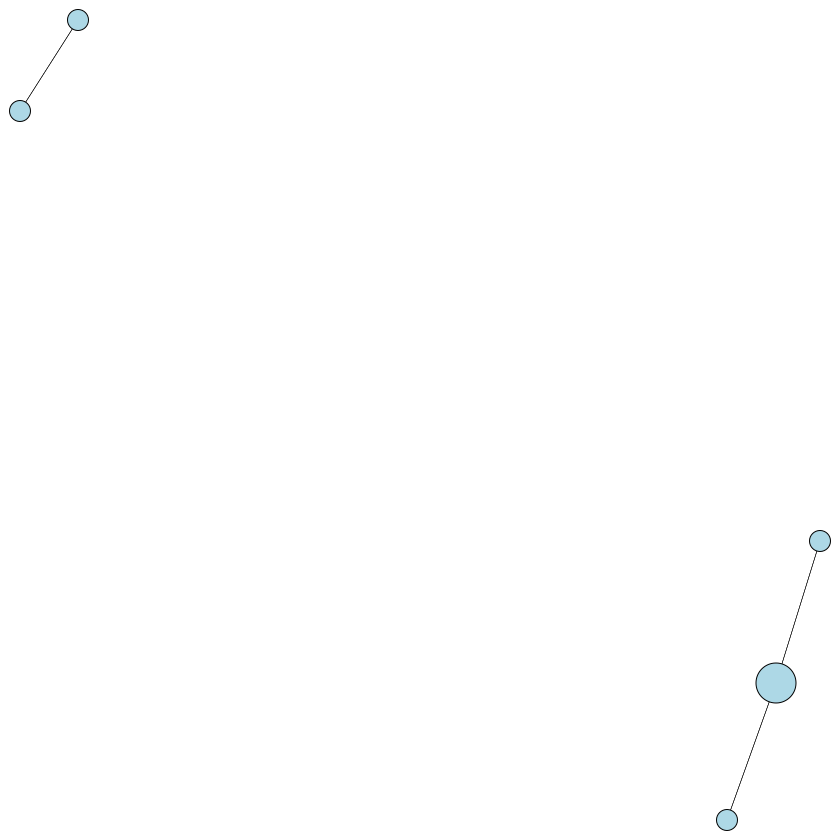

In [217]:
import networkx as nx

text = df['text'][2] # change this number if story is mangled and get an error

entities = extract_entities(text) 

network_df = get_network_data(entities) 

G = nx.from_pandas_edgelist(network_df) 

draw_graph(G, node_size=4, font_size=12) 

['Indonesia' 'Dantje' 'Davis Marthin Damaledo' 'Oemasi' 'Timor Island'
 'Davis' 'Mongabay' 'Phasmid Forum' 'Garda Bagus Damastra' 'Garda'
 'Royce T. Cumming' 'Hennemann' 'Stéphane Le Tirant'
 'City University of New York' 'Montréal Insectarium' 'Canada'
 'Frank H. Hennemann' 'the American Museum of Natural History'
 'Backyard Discovery Reveals ‘Mind' 'Nesiophasma sobesonbaii n. sp'
 'Timor' 'Nesiophasma Günther' 'Nesiophasma sobesonbaii'
 'Sobe Sonbaii III' 'NTT' 'Tenggara' 'East Nusa' 'UK' 'Royal Society'
 'academy of sciences' 'CC BY-ND']


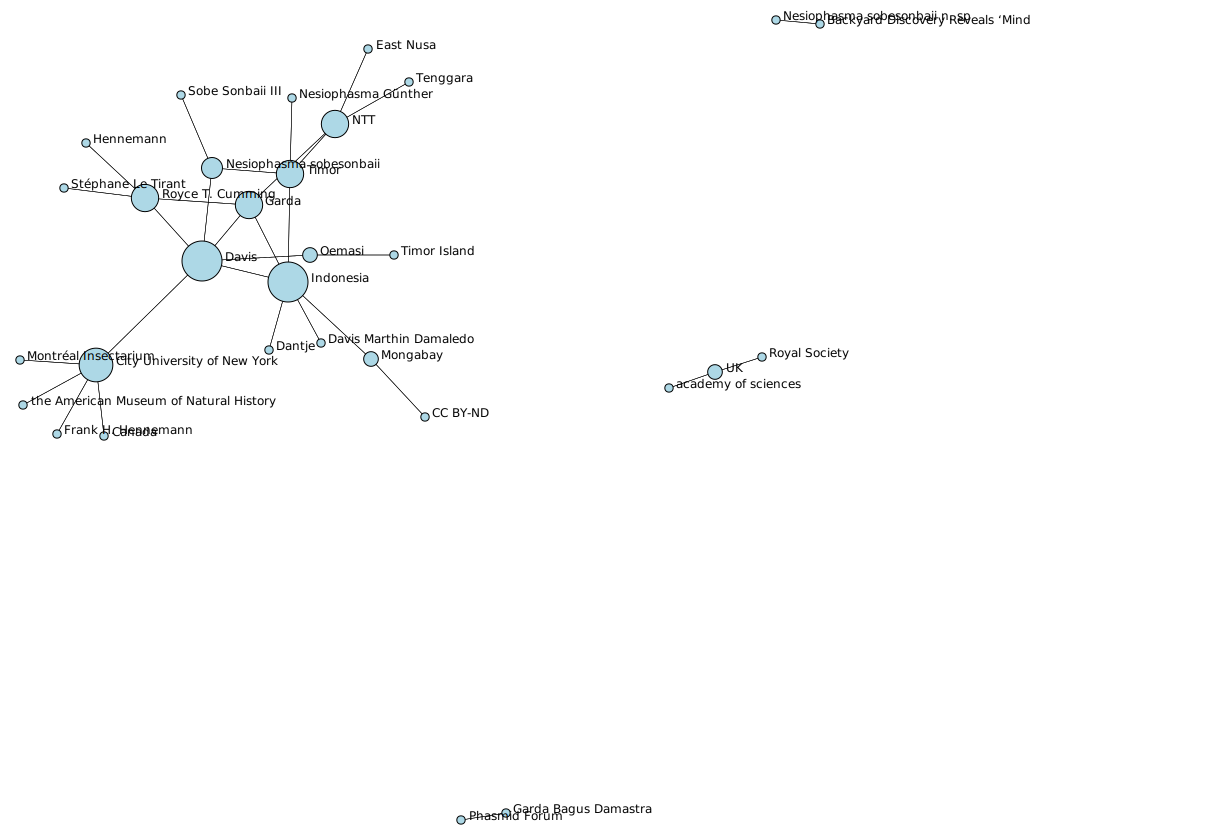

In [218]:
text = df['text'][3] 

entities = extract_entities(text) 

network_df = get_network_data(entities) 

#G = nx.from_numpy_array(network_df) 
G = nx.from_pandas_edgelist(network_df)
draw_graph(G, node_size=4, font_size=12, show_names=True) 

# Twitter

You are going to have to add your bearer token for authentication, so please follow along with the book. 